In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
X = digits["data"]

print(X.shape)
X

(1797, 64)


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

### Visualize

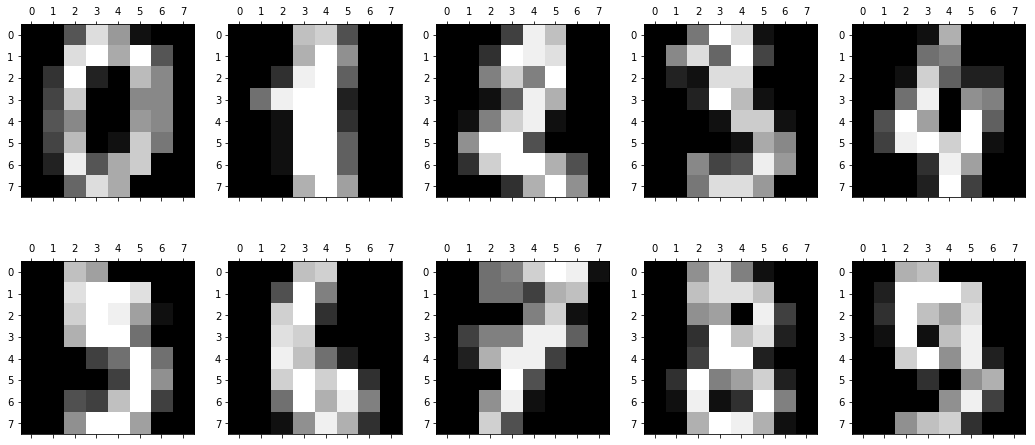

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(18, 8)

axes[0][0].matshow(X[0].reshape(8, 8))
axes[0][1].matshow(X[1].reshape(8, 8))
axes[0][2].matshow(X[2].reshape(8, 8))
axes[0][3].matshow(X[3].reshape(8, 8))
axes[0][4].matshow(X[4].reshape(8, 8))
axes[1][0].matshow(X[5].reshape(8, 8))
axes[1][1].matshow(X[6].reshape(8, 8))
axes[1][2].matshow(X[7].reshape(8, 8))
axes[1][3].matshow(X[8].reshape(8, 8))
axes[1][4].matshow(X[9].reshape(8, 8))

In [5]:
y = digits["target"]

print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

## Preprocessing

In [6]:
X_mean = X.mean()

X = X - X_mean

X.mean(), X.min(), X.max()

(8.995463126623417e-17, -4.8841645798553142, 11.115835420144686)

In [7]:
from keras.utils import to_categorical

y_hot = to_categorical(y)

print(y.shape, y_hot.shape)

Using TensorFlow backend.


(1797,) (1797, 10)


## Define Activation

### Sigmoid

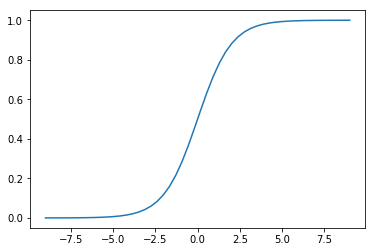

In [8]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid(xx)

plt.plot(xx, yy)

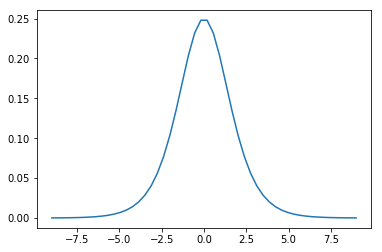

In [9]:
def sigmoid_derivative(n):
    return sigmoid(n) * (1 - sigmoid(n))

xx = np.linspace(start=-9, stop=+9)
yy = sigmoid_derivative(xx)

plt.plot(xx, yy)

## Define Cross Entropy

In [10]:
def cross_entropy(actual, predict, eps=1e-5):
    actual = np.array(actual)
    predict = np.array(predict)

    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)

    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

## Build a Model

In [11]:
from time import time

def train(X, y, num_epoch, learning_rate, update_method):
    history = []

    start = time()

    w1 = np.random.uniform(low=-np.sqrt(6 / (64+100)),
                           high=+np.sqrt(6 / (64+100)),
                           size=(64, 100))

    w2 = np.random.uniform(low=-np.sqrt(6 / (100+10)),
                           high=+np.sqrt(6 / (100+10)),
                           size=(100, 10))

    for epoch in range(num_epoch):
        # Forward Propagation
        z1 = X.dot(w1)
        a1 = sigmoid(z1)
        z2 = a1.dot(w2)
        a2 = sigmoid(z2)

        y_predict = np.argmax(a2, axis=1)

        accuracy = (y_predict == y).mean()
        loss = cross_entropy(a2, y_hot)

        if epoch % (num_epoch // 10) == 0:
            print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))

        history.append({
            'epoch': epoch,
            'elapsed': time() - start,
            'accuracy': accuracy,
            'loss': loss,
        })

        # Backpropagation
        d2 = (a2 - y_hot)
        d1 = d2.dot(w2.T) * sigmoid_derivative(z1)

        # Weight gradients
        dw2 = a1.T.dot(d2)
        dw1 = X.T.dot(d1)

        w1, w2 = update_method(epoch, learning_rate, w1, w2, dw1, dw2)

    print("----" * 10)
    print("{0:3} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy, loss))
    
    history = pd.DataFrame(history)
    history = history[["epoch", "elapsed", "accuracy", "loss"]]

    return history

### Stochastic Gradient Descent

In [12]:
# Write your code here!

def update_sgd(epoch, learning_rate, w1, w2, dw1, dw2):
    w2 = w2 - learning_rate * dw2
    w1 = w1 - learning_rate * dw1
    
    return w1, w2

num_epoch = 100
learning_rate = 0.0001

history_sgd = train(X, y, num_epoch, learning_rate,
                    update_method = update_sgd)

history_sgd.head(10)

  0 accuracy = 0.07568, loss = 5.58334
 10 accuracy = 0.84085, loss = 1.64853
 20 accuracy = 0.90818, loss = 1.29857
 30 accuracy = 0.93155, loss = 1.07193
 40 accuracy = 0.94491, loss = 0.91358
 50 accuracy = 0.95326, loss = 0.79718
 60 accuracy = 0.96105, loss = 0.70793
 70 accuracy = 0.96661, loss = 0.63710
 80 accuracy = 0.97106, loss = 0.57949
 90 accuracy = 0.97329, loss = 0.53174
----------------------------------------
 99 accuracy = 0.97551, loss = 0.49529


,epoch,elapsed,accuracy,loss
0,0,0.009683,0.075682,5.583337
1,1,0.024208,0.207568,1.692206
2,2,0.034226,0.392877,1.836360
3,3,0.042098,0.512521,1.895939
4,4,0.050459,0.606010,1.895760
5,5,0.059184,0.682248,1.865722
6,6,0.067682,0.734558,1.824308
7,7,0.075515,0.781302,1.779858
8,8,0.083853,0.807457,1.735295
9,9,0.091678,0.826934,1.691442


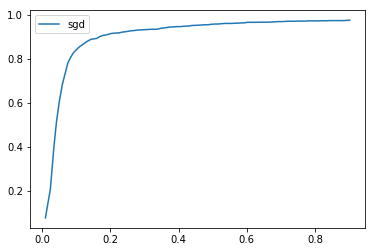

In [13]:
plt.plot(history_sgd['elapsed'], history_sgd['accuracy'], label='sgd')

plt.legend()

### Momentum

In [14]:
# Write your code here!

mu = 0.9

cache_dw1, cache_dw2 = 0, 0

def update_momentum(epoch, learning_rate, w1, w2, dw1, dw2):
    global cache_dw1, cache_dw2
    
    cache_dw2 = mu * cache_dw2 - learning_rate * dw2
    w2 = w2 + cache_dw2
    
    cache_dw1 = mu * cache_dw1 - learning_rate * dw1
    w1 = w1 + cache_dw1
    
    return w1, w2

num_epoch = 100
learning_rate = 0.0001

history_momentum = train(X, y, num_epoch, learning_rate,
                         update_method = update_momentum)
    
history_momentum.head(10)

  0 accuracy = 0.18475, loss = 6.27621
 10 accuracy = 0.79577, loss = 2.11660
 20 accuracy = 0.89816, loss = 1.02100
 30 accuracy = 0.94658, loss = 0.56393
 40 accuracy = 0.96884, loss = 0.36361
 50 accuracy = 0.98164, loss = 0.27009
 60 accuracy = 0.98553, loss = 0.21502
 70 accuracy = 0.98887, loss = 0.18221
 80 accuracy = 0.99165, loss = 0.15920
 90 accuracy = 0.99332, loss = 0.14213
----------------------------------------
 99 accuracy = 0.99332, loss = 0.12976


,epoch,elapsed,accuracy,loss
0,0,0.005315,0.184752,6.276213
1,1,0.017017,0.282693,1.622018
2,2,0.028016,0.302170,1.228058
3,3,0.036249,0.323873,1.198835
4,4,0.046920,0.356149,1.238601
5,5,0.055589,0.372287,1.353465
6,6,0.064031,0.416806,1.553810
7,7,0.072128,0.474124,1.829706
8,8,0.079974,0.641068,2.105618
9,9,0.088103,0.786311,2.235140


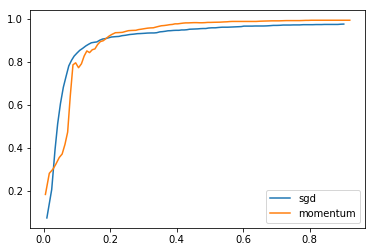

In [15]:
plt.plot(history_sgd['elapsed'], history_sgd['accuracy'], label='sgd')
plt.plot(history_momentum['elapsed'], history_momentum['accuracy'], label='momentum')

plt.legend()

### Nesterov Momentum

In [16]:
# Write your code here!

mu = 0.9

cache_dw1, cache_dw2 = 0, 0

def update_nesterov(epoch, learning_rate, w1, w2, dw1, dw2):
    global cache_dw1, cache_dw2
    
    dw2_prev = cache_dw2
    cache_dw2 = mu * cache_dw2 - learning_rate * dw2
    w2 = w2 + (-mu * dw2_prev) + (1 + mu) * cache_dw2
    
    dw1_prev = cache_dw1
    cache_dw1 = mu * cache_dw1 - learning_rate * dw1
    w1 = w1 + (-mu * dw1_prev) + (1 + mu) * cache_dw1
    
    return w1, w2

num_epoch = 100
learning_rate = 0.0001

history_nesterov = train(X, y, num_epoch, learning_rate,
                         update_method = update_nesterov)

history_nesterov.head(10)

  0 accuracy = 0.09683, loss = 5.74303
 10 accuracy = 0.88036, loss = 1.25833
 20 accuracy = 0.94936, loss = 0.60960
 30 accuracy = 0.96995, loss = 0.34195
 40 accuracy = 0.98609, loss = 0.23259
 50 accuracy = 0.98887, loss = 0.17851
 60 accuracy = 0.99221, loss = 0.14675
 70 accuracy = 0.99444, loss = 0.12637
 80 accuracy = 0.99499, loss = 0.11137
 90 accuracy = 0.99499, loss = 0.09979
----------------------------------------
 99 accuracy = 0.99555, loss = 0.09138


,epoch,elapsed,accuracy,loss
0,0,0.005255,0.096828,5.743032
1,1,0.016009,0.109627,1.273479
2,2,0.027003,0.153033,1.305051
3,3,0.037689,0.272120,1.460711
4,4,0.045952,0.380078,1.675385
5,5,0.054947,0.499165,1.795231
6,6,0.063079,0.654981,1.810989
7,7,0.071460,0.697830,1.674761
8,8,0.079493,0.736784,1.505719
9,9,0.087697,0.818030,1.365389


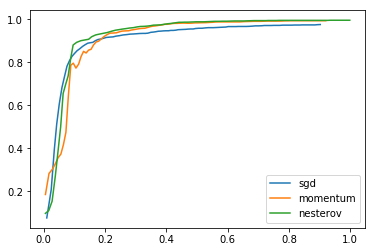

In [17]:
plt.plot(history_sgd['elapsed'], history_sgd['accuracy'], label='sgd')
plt.plot(history_momentum['elapsed'], history_momentum['accuracy'], label='momentum')
plt.plot(history_nesterov['elapsed'], history_nesterov['accuracy'], label='nesterov')


plt.legend()

### AdaGrad

In [18]:
# Write your code here!

eps = 0.000000000001
cache_dw1, cache_dw2 = 0, 0

def update_adagrad(epoch, learning_rate, w1, w2, dw1, dw2):
    global cache_dw1, cache_dw2
    
    cache_dw2 = cache_dw2 + dw2 ** 2
    w2 = w2 - learning_rate * dw2 / (np.sqrt(cache_dw2) + eps)
    
    cache_dw1 = cache_dw1 + dw1 ** 2
    w1 = w1 - learning_rate * dw1 / (np.sqrt(cache_dw1) + eps)
    
    return w1, w2

num_epoch = 100
learning_rate = 0.01

history_adagrad = train(X, y, num_epoch, learning_rate,
                         update_method = update_adagrad)

history_adagrad.head(10)

  0 accuracy = 0.09850, loss = 5.05303
 10 accuracy = 0.84363, loss = 1.77944
 20 accuracy = 0.89649, loss = 1.51760
 30 accuracy = 0.91597, loss = 1.33541
 40 accuracy = 0.93155, loss = 1.20084
 50 accuracy = 0.94213, loss = 1.09480
 60 accuracy = 0.95159, loss = 1.00900
 70 accuracy = 0.95437, loss = 0.93618
 80 accuracy = 0.96160, loss = 0.87384
 90 accuracy = 0.96605, loss = 0.82097
----------------------------------------
 99 accuracy = 0.96661, loss = 0.77977


,epoch,elapsed,accuracy,loss
0,0,0.005062,0.098497,5.053033
1,1,0.017001,0.200890,3.005381
2,2,0.027792,0.329994,2.479846
3,3,0.039045,0.462437,2.241579
4,4,0.047074,0.580968,2.104131
5,5,0.057179,0.658876,2.015764
6,6,0.065217,0.729549,1.948677
7,7,0.073134,0.774624,1.897547
8,8,0.081240,0.802449,1.852573
9,9,0.089365,0.826377,1.814819


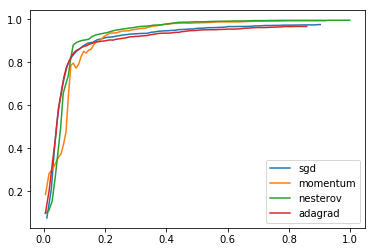

In [19]:
plt.plot(history_sgd['elapsed'], history_sgd['accuracy'], label='sgd')
plt.plot(history_momentum['elapsed'], history_momentum['accuracy'], label='momentum')
plt.plot(history_nesterov['elapsed'], history_nesterov['accuracy'], label='nesterov')
plt.plot(history_adagrad['elapsed'], history_adagrad['accuracy'], label='adagrad')

plt.legend()

### RMSProp

In [20]:
# Write your code here!

decay = 0.995
eps = 0.000000000001
cache_dw1, cache_dw2 = 0, 0

def update_rmsprop(epoch, learning_rate, w1, w2, dw1, dw2):
    global cache_dw1, cache_dw2
    
    cache_dw2 = decay * cache_dw2 + (1 - decay) * dw2 ** 2
    w2 = w2 - learning_rate * dw2 / (np.sqrt(cache_dw2) + eps)
    
    cache_dw1 = decay * cache_dw1 + (1 - decay) * dw1 ** 2
    w1 = w1 - learning_rate * dw1 / (np.sqrt(cache_dw1) + eps)
    
    return w1, w2

num_epoch = 100
learning_rate = 0.003

history_rmsprop = train(X, y, num_epoch, learning_rate,
                        update_method = update_rmsprop)

history_rmsprop.head(10)

  0 accuracy = 0.07513, loss = 6.09293
 10 accuracy = 0.88203, loss = 1.36482
 20 accuracy = 0.95270, loss = 0.97050
 30 accuracy = 0.97273, loss = 0.75346
 40 accuracy = 0.97830, loss = 0.60527
 50 accuracy = 0.98219, loss = 0.50566
 60 accuracy = 0.98442, loss = 0.43196
 70 accuracy = 0.98720, loss = 0.37740
 80 accuracy = 0.98943, loss = 0.33524
 90 accuracy = 0.98998, loss = 0.30083
----------------------------------------
 99 accuracy = 0.99110, loss = 0.27670


,epoch,elapsed,accuracy,loss
0,0,0.007604,0.075125,6.092929
1,1,0.021787,0.100167,1.675017
2,2,0.038743,0.461324,2.105069
3,3,0.051145,0.688370,1.787316
4,4,0.062274,0.750139,1.847006
5,5,0.073713,0.747913,1.671113
6,6,0.084579,0.824708,1.650450
7,7,0.095771,0.788536,1.604008
8,8,0.105293,0.858653,1.481873
9,9,0.115791,0.835281,1.512350


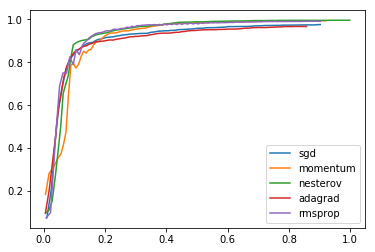

In [21]:
plt.plot(history_sgd['elapsed'], history_sgd['accuracy'], label='sgd')
plt.plot(history_momentum['elapsed'], history_momentum['accuracy'], label='momentum')
plt.plot(history_nesterov['elapsed'], history_nesterov['accuracy'], label='nesterov')
plt.plot(history_adagrad['elapsed'], history_adagrad['accuracy'], label='adagrad')
plt.plot(history_rmsprop['elapsed'], history_rmsprop['accuracy'], label='rmsprop')

plt.legend()

### Adam

In [28]:
## Write your code here!

eps = 0.000000000001
beta1 = 0.9
beta2 = 0.99

dw1m, dw2m = 0, 0
dw1v, dw2v = 0, 0

def update_adam(epoch, learning_rate, w1, w2, dw1, dw2):
    global dw1m, dw2m
    global dw1v, dw2v
    
    dw2m = beta1 * dw2m + (1 - beta1) * dw2
    dw2v = beta2 * dw2v + (1 - beta2) * (dw2 ** 2)
    dw2mb = dw2m / (1 - beta1 ** (1 + epoch))
    dw2vb = dw2v / (1 - beta2 ** (1 + epoch))
    w2 = w2 - learning_rate * dw2mb / (np.sqrt(dw2vb) + eps)
    
    dw1m = beta1 * dw1m + (1 - beta1) * dw1
    dw1v = beta2 * dw1v + (1 - beta2) * (dw1 ** 2)
    dw1mb = dw1m / (1 - beta1 ** (1 + epoch))
    dw1vb = dw1v / (1 - beta2 ** (1 + epoch))
    w1 = w1 - learning_rate * dw1mb / (np.sqrt(dw1vb) + eps)
    
    return w1, w2

num_epoch = 100
learning_rate = 0.01

history_adam = train(X, y, num_epoch, learning_rate,
                        update_method = update_adam)

history_adam.head(10)

  0 accuracy = 0.20590, loss = 5.59424
 10 accuracy = 0.74012, loss = 1.47707
 20 accuracy = 0.89482, loss = 1.44458
 30 accuracy = 0.93322, loss = 1.05725
 40 accuracy = 0.94602, loss = 0.82127
 50 accuracy = 0.96327, loss = 0.65025
 60 accuracy = 0.97774, loss = 0.52102
 70 accuracy = 0.98219, loss = 0.42101
 80 accuracy = 0.98609, loss = 0.34646
 90 accuracy = 0.98943, loss = 0.29119
----------------------------------------
 99 accuracy = 0.99110, loss = 0.25322


,epoch,elapsed,accuracy,loss
0,0,0.004512,0.205899,5.594240
1,1,0.016223,0.286589,3.456232
2,2,0.027398,0.398998,2.291069
3,3,0.037300,0.461324,1.798690
4,4,0.046952,0.598776,1.595736
5,5,0.057733,0.664997,1.509912
6,6,0.069214,0.616583,1.475392
7,7,0.078429,0.587090,1.464597
8,8,0.089505,0.609905,1.465218
9,9,0.099062,0.674457,1.470733


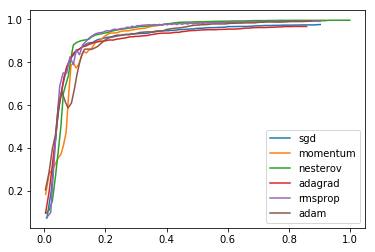

In [30]:
plt.plot(history_sgd['elapsed'], history_sgd['accuracy'], label='sgd')
plt.plot(history_momentum['elapsed'], history_momentum['accuracy'], label='momentum')
plt.plot(history_nesterov['elapsed'], history_nesterov['accuracy'], label='nesterov')
plt.plot(history_adagrad['elapsed'], history_adagrad['accuracy'], label='adagrad')
plt.plot(history_rmsprop['elapsed'], history_rmsprop['accuracy'], label='rmsprop')
plt.plot(history_adam['elapsed'], history_adam['accuracy'], label='adam')

plt.legend()